<a href="https://colab.research.google.com/github/islam-mirajul/ICP-Pattern-Recognition/blob/main/ICP_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UGV Regression Analysis for Operational Range Prediction**

 Import Libraries and Load Data

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
file_path = '/content/drive/MyDrive/Courses/Pattern Recognition/ICP/ICP_Data.csv'
data = pd.read_csv(file_path)

# Display first few rows
print(tabulate(data.head(), headers='keys', tablefmt='psql'))


+----+-------------+----------------------------+-----------------------+------------------+--------------------------+-----------------------------+-----------------+--------------------+---------------------+-----------------------+--------------------------+-------------------------+---------------------------+-----------------+--------------------+-----------------------+--------------------------+--------------------------------+--------------------------+-------------------------+---------------------+--------------------------+---------------------+-------------------------+---------------------------+
|    |   Design_ID | Chassis_Type               | Wheel_Configuration   |   Footprint_Area |   Volume_to_Weight_Ratio |   Chassis_Weight_Percentage |   Power_Density |   Power_Efficiency |   Energy_Efficiency |   Motor_Power_Density |   Battery_Energy_Density |   Motor_to_Weight_Ratio |   Battery_to_Weight_Ratio |   Agility_Score |   Stability_Factor |   Speed_to_Size_Ratio |   Wh

Preprocess Data

In [ ]:
# Drop unnecessary columns
data = data.drop(columns=['Design_ID', 'Chassis_Type'])

# Display first few rows
print(tabulate(data.head(), headers='keys', tablefmt='psql'))

# Encode categorical variable
le = LabelEncoder()
data['Wheel_Configuration'] = le.fit_transform(data['Wheel_Configuration'])

# Define features and target
target = 'Operational_Range'
features = [
    'Wheel_Configuration', 'Footprint_Area', 'Volume_to_Weight_Ratio',
    'Chassis_Weight_Percentage', 'Power_Density', 'Power_Efficiency',
    'Energy_Efficiency', 'Motor_Power_Density', 'Battery_Energy_Density',
    'Motor_to_Weight_Ratio', 'Battery_to_Weight_Ratio', 'Agility_Score',
    'Stability_Factor', 'Speed_to_Size_Ratio', 'Wheel_to_Chassis_Ratio',
    'Terrain_Adaptability (ratio)', 'Torque_to_Weight_Ratio',
    'Operational_Endurance', 'Control_Responsiveness',
    'Control_Precision', 'Sensor_Coverage_Ratio',
    'Sensor_Range_Efficiency'
]

# Split the data
X = data[features]
y = data[target]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print dataset sizes
print(f"Training set size: {len(X_train)} samples")
print(f"Validation set size: {len(X_val)} samples")
print(f"Testing set size: {len(X_test)} samples")

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


+----+-----------------------+------------------+--------------------------+-----------------------------+-----------------+--------------------+---------------------+-----------------------+--------------------------+-------------------------+---------------------------+-----------------+--------------------+-----------------------+--------------------------+--------------------------------+--------------------------+-------------------------+---------------------+--------------------------+---------------------+-------------------------+---------------------------+
|    | Wheel_Configuration   |   Footprint_Area |   Volume_to_Weight_Ratio |   Chassis_Weight_Percentage |   Power_Density |   Power_Efficiency |   Energy_Efficiency |   Motor_Power_Density |   Battery_Energy_Density |   Motor_to_Weight_Ratio |   Battery_to_Weight_Ratio |   Agility_Score |   Stability_Factor |   Speed_to_Size_Ratio |   Wheel_to_Chassis_Ratio |   Terrain_Adaptability (ratio) |   Torque_to_Weight_Ratio |   O

### Data visualizations

Correlation Heatmap

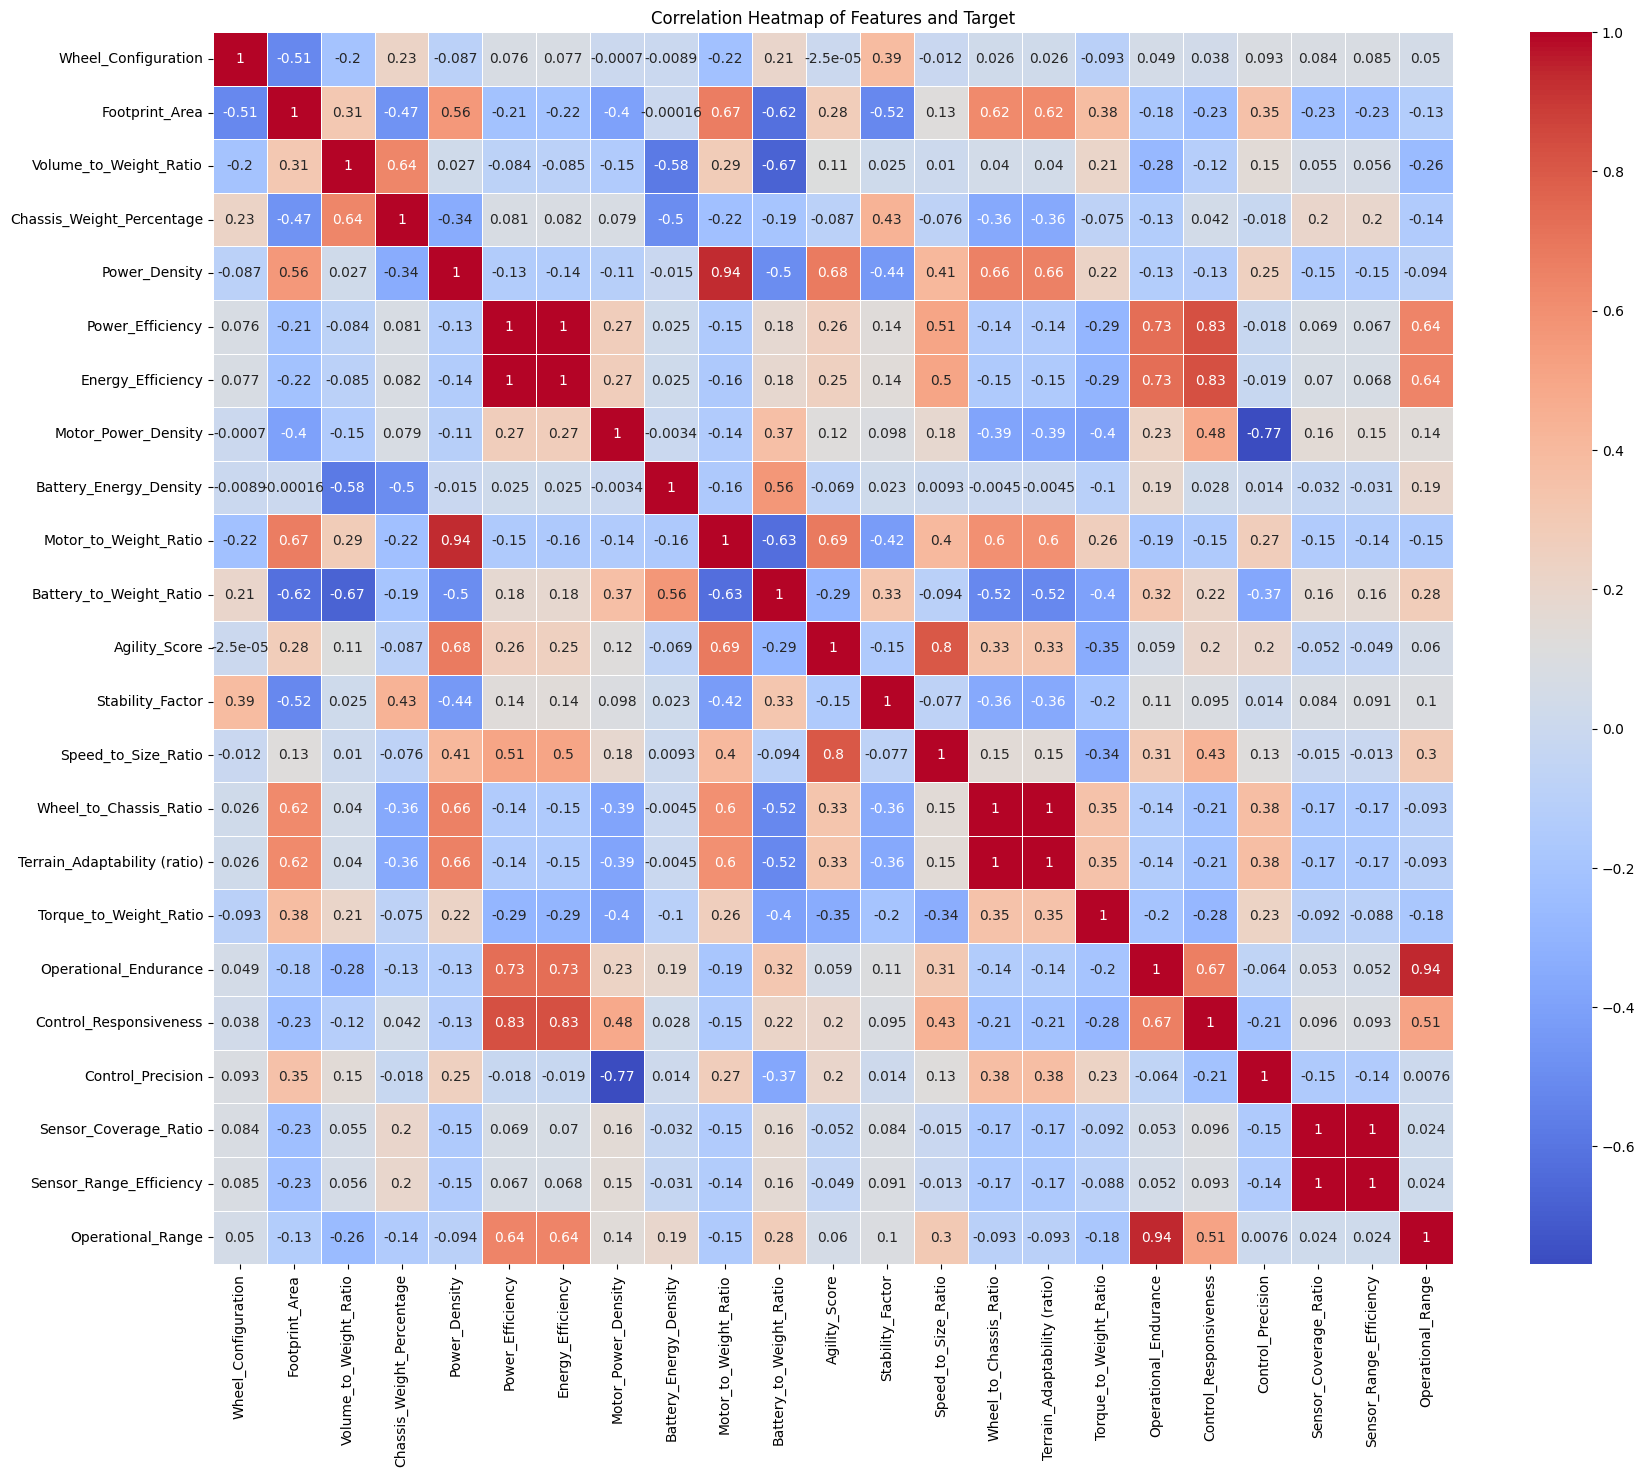

In [ ]:
import seaborn as sns

plt.figure(figsize=(20, 16))
correlation_matrix = data[features + [target]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features and Target')
plt.show()

Feature Importance (using Random Forest)

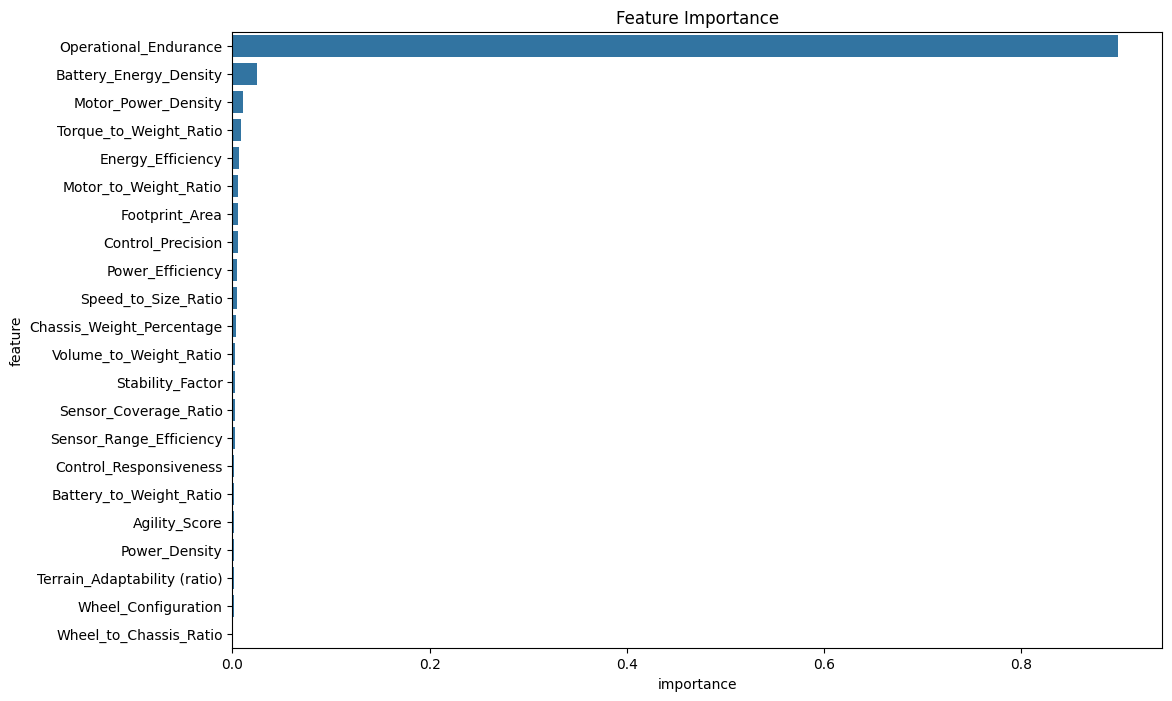

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

feature_importance = pd.DataFrame({'feature': features, 'importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

Distribution of Target Variable

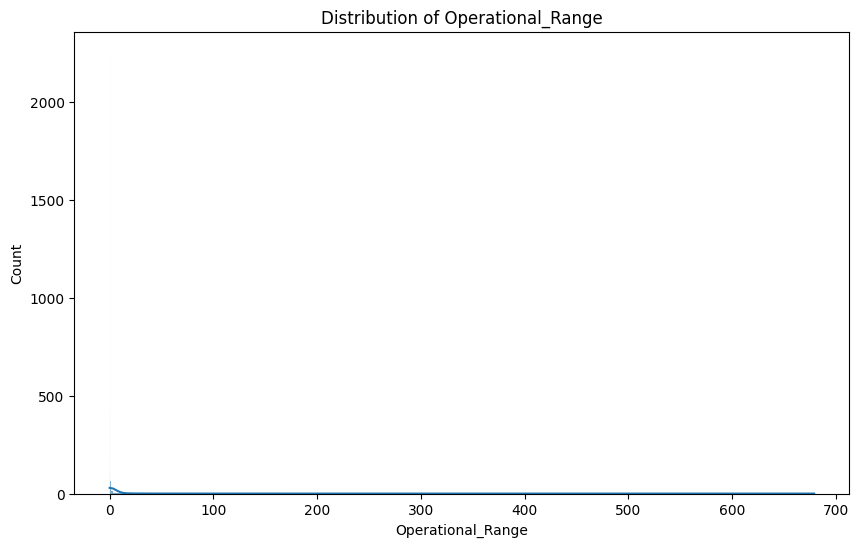

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data[target], kde=True)
plt.title(f'Distribution of {target}')
plt.xlabel(target)
plt.show()

Scatter Plot of Top Features vs Target
python

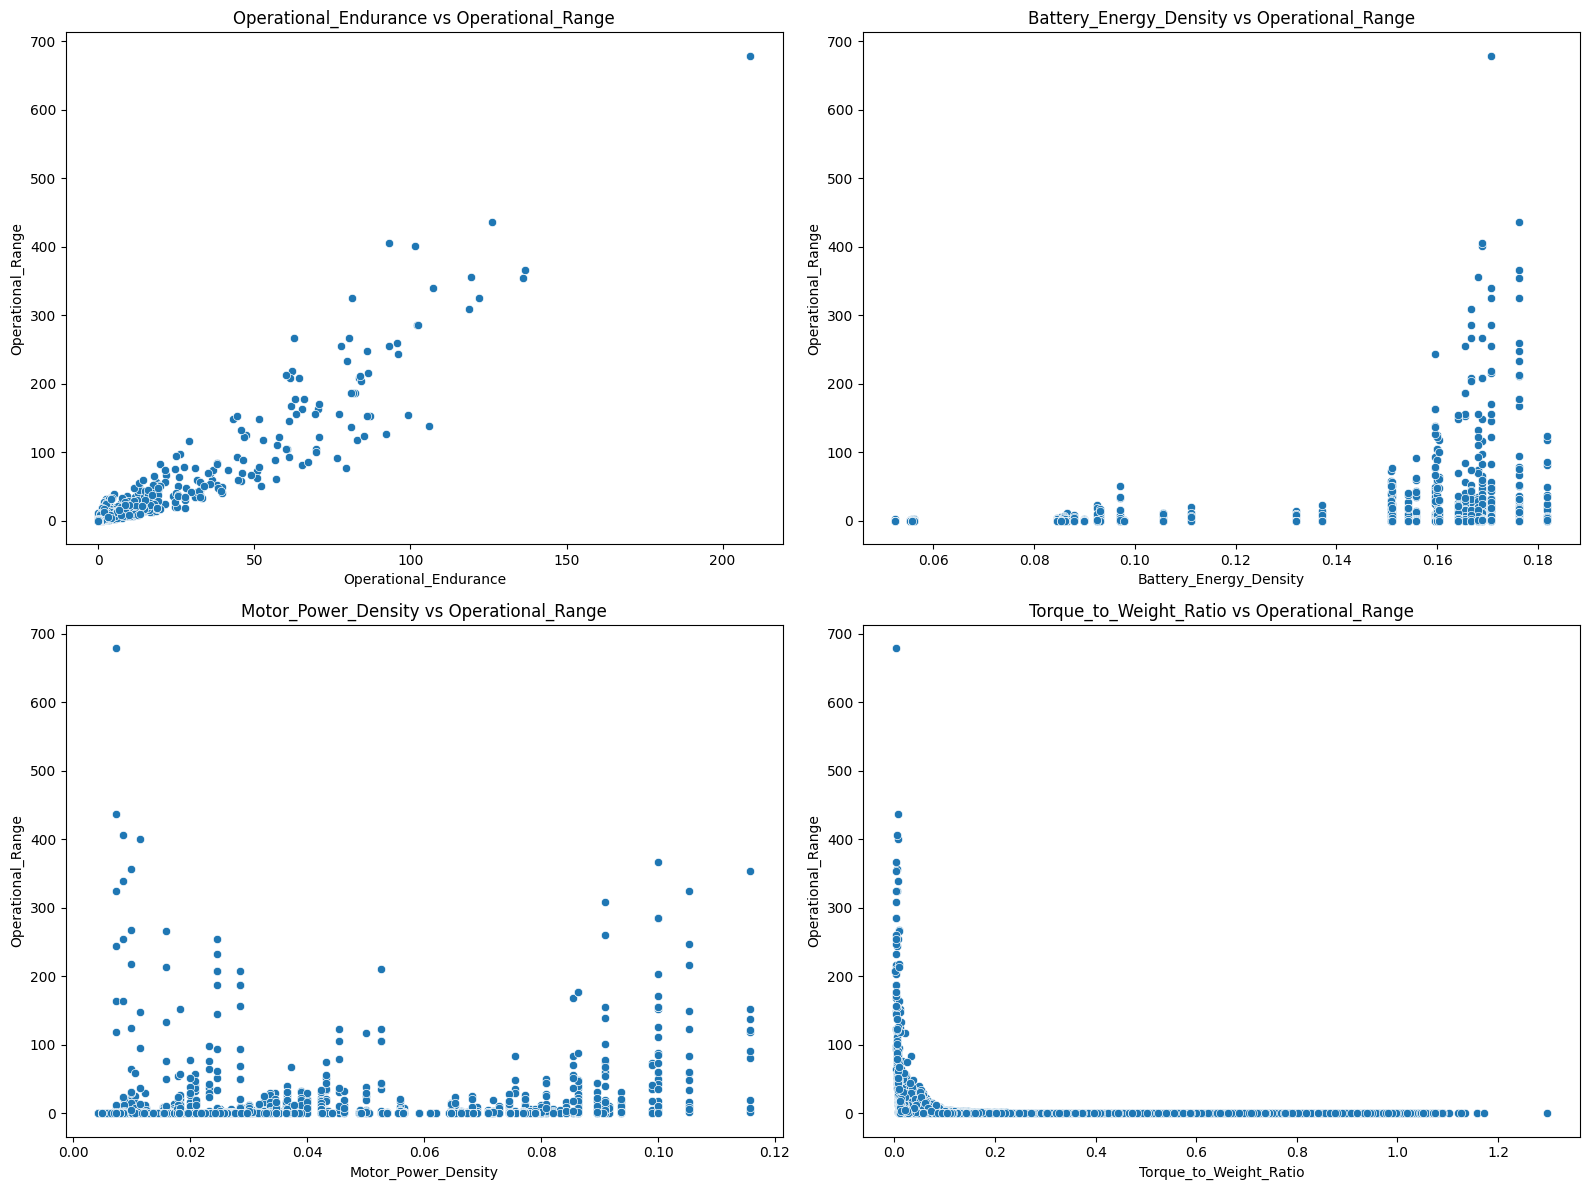

In [ ]:
top_features = feature_importance['feature'].head(4).tolist()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, feature in enumerate(top_features):
    sns.scatterplot(data=data, x=feature, y=target, ax=axes[i])
    axes[i].set_title(f'{feature} vs {target}')

plt.tight_layout()
plt.show()

## Using Different Models

Support Vector Regression

SVR Results:
MAE: 5.575392429062065, MSE: 1366.6778923242493, RMSE: 36.968606848571525, RMSLE: 0.4724567072766028, R²: 0.07935135508574176


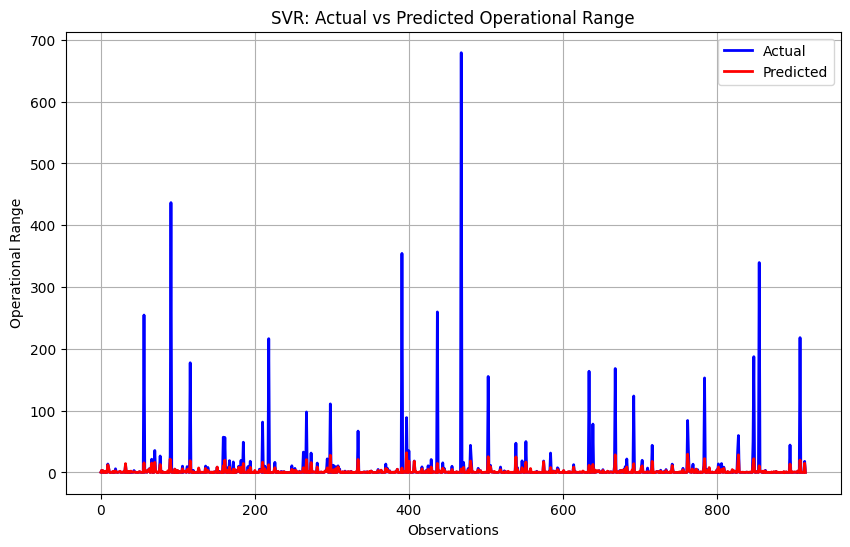

In [ ]:
# Train SVR model
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

# Predictions and metrics
y_pred_svr = svr_model.predict(X_val_scaled)
mae_svr = mean_absolute_error(y_val, y_pred_svr)
mse_svr = mean_squared_error(y_val, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
rmsle_svr = np.sqrt(mean_squared_error(np.log1p(y_val), np.log1p(y_pred_svr)))
r2_svr = r2_score(y_val, y_pred_svr)

# Print metrics
print("SVR Results:")
print(f"MAE: {mae_svr}, MSE: {mse_svr}, RMSE: {rmse_svr}, RMSLE: {rmsle_svr}, R²: {r2_svr}")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label='Actual', color='b', linewidth=2)
plt.plot(y_pred_svr, label='Predicted', color='r', linewidth=2)
plt.title("SVR: Actual vs Predicted Operational Range")
plt.xlabel("Observations")
plt.ylabel("Operational Range")
plt.legend()
plt.grid(0.3)
plt.show()


Random Forest Regression

Random Forest Results:
MAE: 1.3520780307860263, MSE: 173.0158118027164, RMSE: 13.153547498782084, RMSLE: 0.09495267603638541, R²: 0.8834496602458249


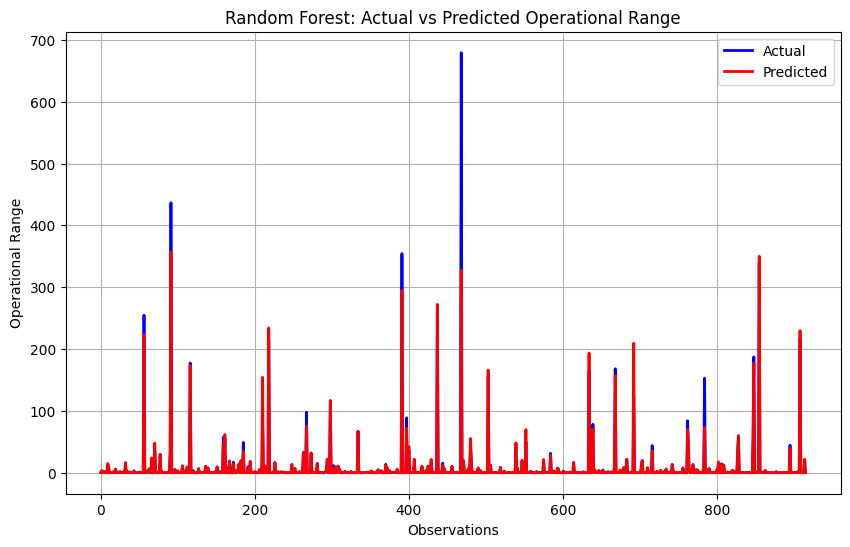

In [ ]:
# Train Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)

# Predictions and metrics
y_pred_rf = rf_model.predict(X_val_scaled)
mae_rf = mean_absolute_error(y_val, y_pred_rf)
mse_rf = mean_squared_error(y_val, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
rmsle_rf = np.sqrt(mean_squared_error(np.log1p(y_val), np.log1p(y_pred_rf)))
r2_rf = r2_score(y_val, y_pred_rf)

# Print metrics
print("Random Forest Results:")
print(f"MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, RMSLE: {rmsle_rf}, R²: {r2_rf}")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label='Actual', color='b', linewidth=2)
plt.plot(y_pred_rf, label='Predicted', color='r', linewidth=2)
plt.title("Random Forest: Actual vs Predicted Operational Range")
plt.xlabel("Observations")
plt.ylabel("Operational Range")
plt.legend()
plt.grid(0.3)
plt.show()


Gradient Boosting Regression

Gradient Boosting Results:
MAE: 1.4400555293034851, MSE: 141.66659596514745, RMSE: 11.902377744179836, R²: 0.9045677402572743


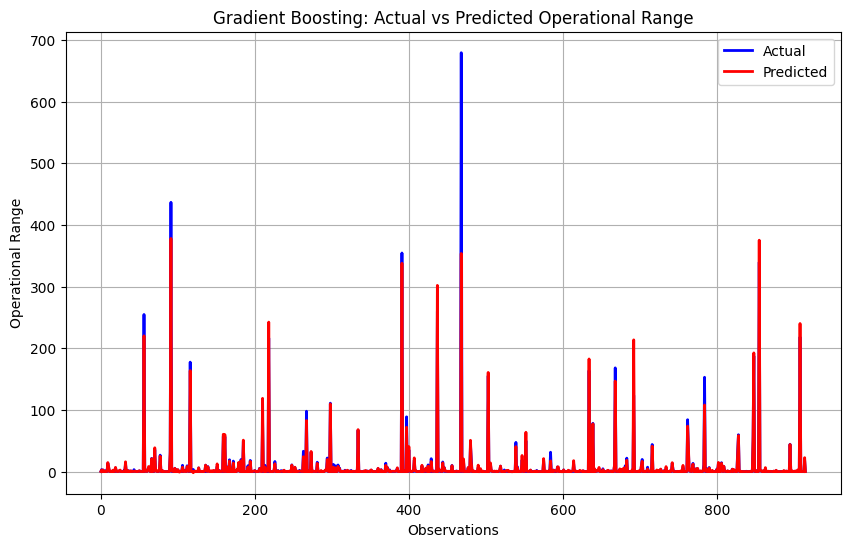

In [ ]:
# Train Gradient Boosting model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_scaled, y_train)

# Predictions and metrics
y_pred_gb = gb_model.predict(X_val_scaled)
mae_gb = mean_absolute_error(y_val, y_pred_gb)
mse_gb = mean_squared_error(y_val, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_val, y_pred_gb)

# Print metrics
print("Gradient Boosting Results:")
print(f"MAE: {mae_gb}, MSE: {mse_gb}, RMSE: {rmse_gb}, R²: {r2_gb}")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label='Actual', color='b', linewidth=2)
plt.plot(y_pred_gb, label='Predicted', color='r', linewidth=2)
plt.title("Gradient Boosting: Actual vs Predicted Operational Range")
plt.xlabel("Observations")
plt.ylabel("Operational Range")
plt.legend()
plt.grid(0.3)
plt.show()


Regularized Least Squares: Ridge Regression

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

Ridge Regression Results:
MAE: 2.6182944186655748, MSE: 64.7935462183748, RMSE: 8.049443845283648, R²: 0.9563524874001668


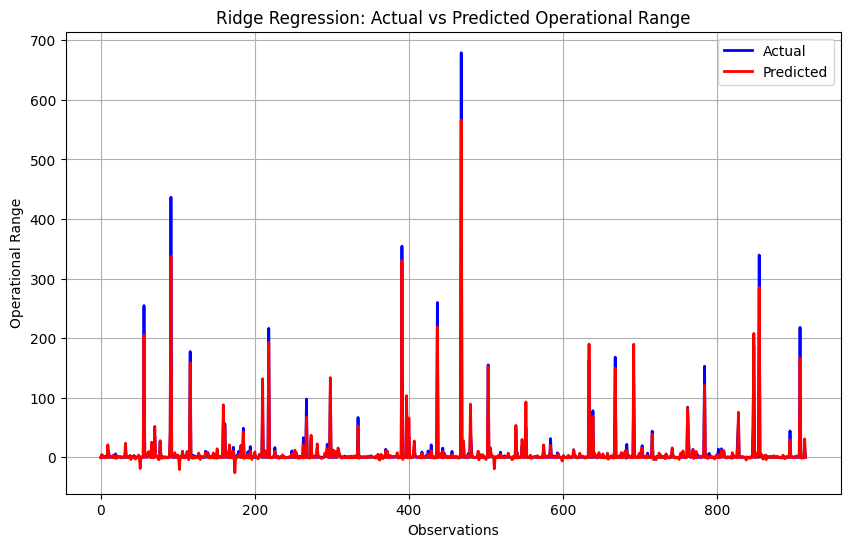

In [ ]:
# Ridge Regression Model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_val_scaled)

# Metrics
mae_ridge = mean_absolute_error(y_val, y_pred_ridge)
mse_ridge = mean_squared_error(y_val, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_val, y_pred_ridge)

# Print Metrics
print("Ridge Regression Results:")
print(f"MAE: {mae_ridge}, MSE: {mse_ridge}, RMSE: {rmse_ridge}, R²: {r2_ridge}")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label='Actual', color='b', linewidth=2)  # Actual values
plt.plot(y_pred_ridge, label='Predicted', color='r', linewidth=2)  # Predicted values
plt.title("Ridge Regression: Actual vs Predicted Operational Range")
plt.xlabel("Observations")
plt.ylabel("Operational Range")
plt.legend()
plt.grid(0.3)
plt.show()

Regularized Least Squares: Lasso Regression

Lasso Regression Results:
MAE: 2.4323880228378565, MSE: 69.52981800158655, RMSE: 8.338454173381692, R²: 0.9531619461441405


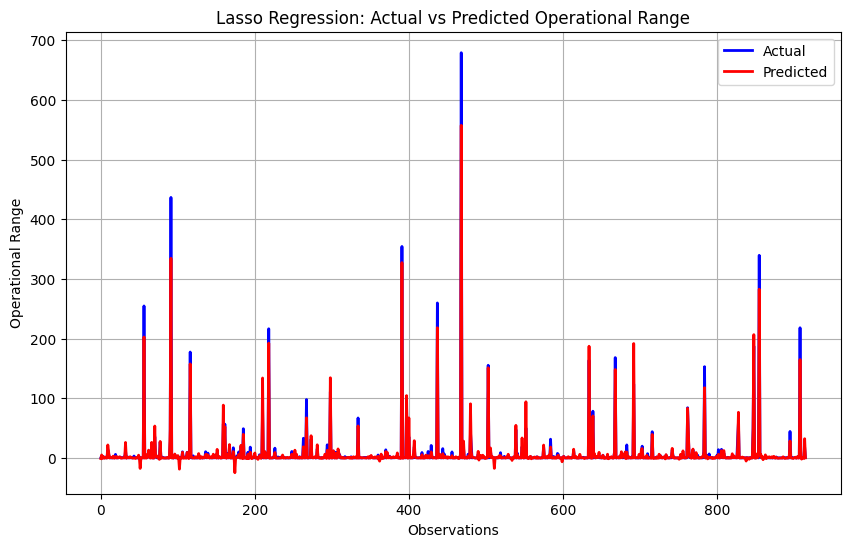

In [ ]:
# Lasso Regression Model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lasso = lasso_model.predict(X_val_scaled)

# Metrics
mae_lasso = mean_absolute_error(y_val, y_pred_lasso)
mse_lasso = mean_squared_error(y_val, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_val, y_pred_lasso)

# Print Metrics
print("Lasso Regression Results:")
print(f"MAE: {mae_lasso}, MSE: {mse_lasso}, RMSE: {rmse_lasso}, R²: {r2_lasso}")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label='Actual', color='b', linewidth=2)  # Actual values
plt.plot(y_pred_lasso, label='Predicted', color='r', linewidth=2)  # Corrected to Lasso predictions
plt.title("Lasso Regression: Actual vs Predicted Operational Range")
plt.xlabel("Observations")
plt.ylabel("Operational Range")
plt.legend()
plt.grid(0.3)
plt.show()

### Baseline Methods

Mean Prediction

Mean Prediction Results:
MAE: 10.17939772931324, MSE: 1487.9680137659843, RMSE: 38.574188439499075, R²: -0.0023545000934288574


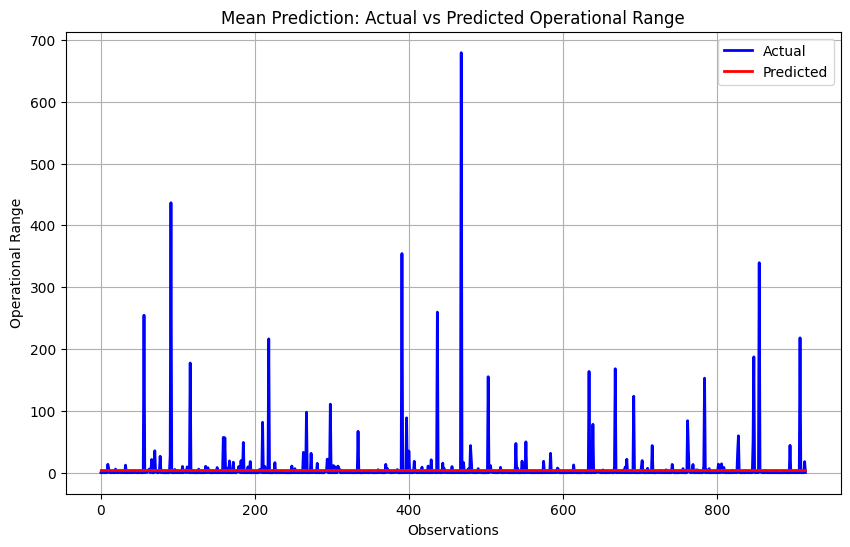

In [ ]:
# Mean Prediction
mean_prediction = np.mean(y_train)
y_pred_mean = np.full(y_val.shape, mean_prediction)

# Metrics
mae_mean = mean_absolute_error(y_val, y_pred_mean)
mse_mean = mean_squared_error(y_val, y_pred_mean)
rmse_mean = np.sqrt(mse_mean)
r2_mean = r2_score(y_val, y_pred_mean)

# Print metrics
print("Mean Prediction Results:")
print(f"MAE: {mae_mean}, MSE: {mse_mean}, RMSE: {rmse_mean}, R²: {r2_mean}")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label='Actual', color='b', linewidth=2)
plt.plot(y_pred_mean, label='Predicted', color='r', linewidth=2)  # Corrected line
plt.title("Mean Prediction: Actual vs Predicted Operational Range")
plt.xlabel("Observations")
plt.ylabel("Operational Range")
plt.legend()
plt.grid(0.3)
plt.show()


Median Prediction

Median Prediction Results:
MAE: 6.99075100436681, MSE: 1532.2448215852164, RMSE: 39.14389890628189, R²: -0.03218112079816593


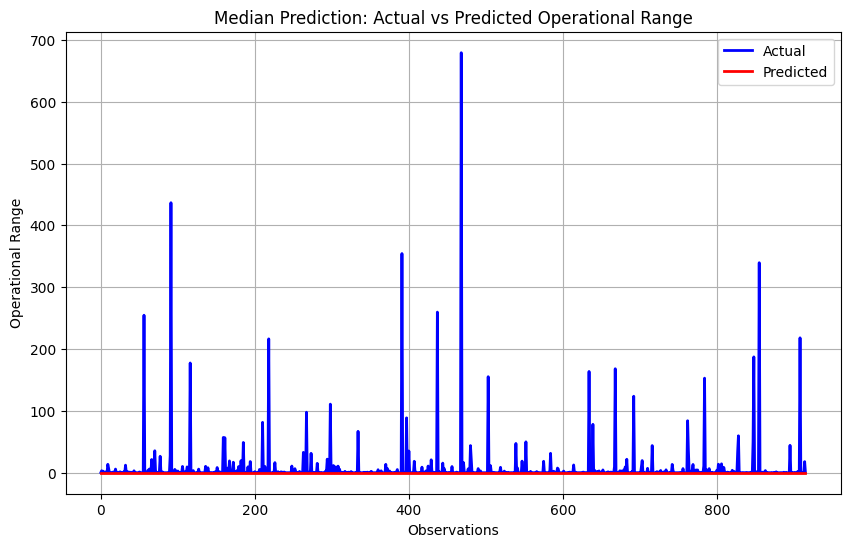

In [ ]:
# Median Prediction
median_prediction = np.median(y_train)
y_pred_median = np.full(y_val.shape, median_prediction)

# Metrics
mae_median = mean_absolute_error(y_val, y_pred_median)
mse_median = mean_squared_error(y_val, y_pred_median)
rmse_median = np.sqrt(mse_median)
r2_median = r2_score(y_val, y_pred_median)

# Print metrics
print("Median Prediction Results:")
print(f"MAE: {mae_median}, MSE: {mse_median}, RMSE: {rmse_median}, R²: {r2_median}")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label='Actual', color='b', linewidth=2)
plt.plot(y_pred_median, label='Predicted', color='r', linewidth=2)  # Corrected line
plt.title("Median Prediction: Actual vs Predicted Operational Range")  # Updated title
plt.xlabel("Observations")
plt.ylabel("Operational Range")
plt.legend()
plt.grid(0.3)
plt.show()


Persistence Model (Last Value Prediction)

Persistence Model Results:
MAE: 7.2899282969432315, MSE: 1521.5258413630922, RMSE: 39.00674097336372, R²: -0.02496038892580188


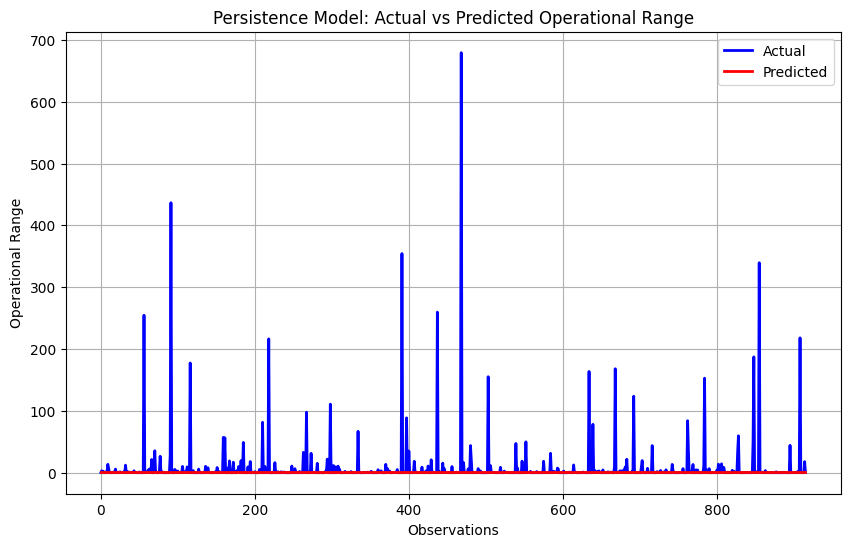

In [ ]:
# Persistence Model (Last Value Prediction)
y_pred_persistence = np.full(y_val.shape, y_train.iloc[-1])

# Metrics
mae_persistence = mean_absolute_error(y_val, y_pred_persistence)
mse_persistence = mean_squared_error(y_val, y_pred_persistence)
rmse_persistence = np.sqrt(mse_persistence)
r2_persistence = r2_score(y_val, y_pred_persistence)

# Print metrics
print("Persistence Model Results:")
print(f"MAE: {mae_persistence}, MSE: {mse_persistence}, RMSE: {rmse_persistence}, R²: {r2_persistence}")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label='Actual', color='b', linewidth=2)
plt.plot(y_pred_persistence, label='Predicted', color='r', linewidth=2)
plt.title("Persistence Model: Actual vs Predicted Operational Range")
plt.xlabel("Observations")
plt.ylabel("Operational Range")
plt.legend()
plt.grid(0.3)
plt.show()


Zero Prediction


Zero Prediction Results:
MAE: 7.019029104803494, MSE: 1533.7395919411072, RMSE: 39.16298752573796, R²: -0.03318805762676158


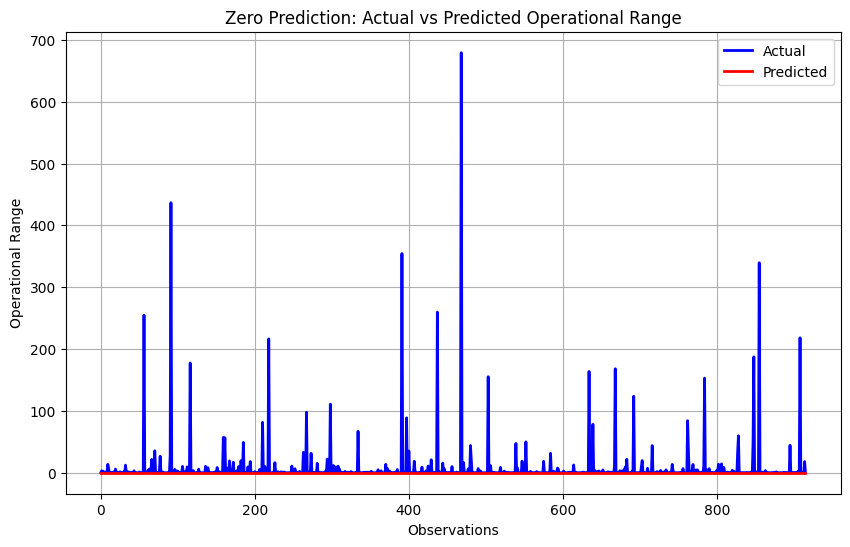

In [ ]:
# Zero Prediction
y_pred_zero = np.zeros_like(y_val)

# Metrics
mae_zero = mean_absolute_error(y_val, y_pred_zero)
mse_zero = mean_squared_error(y_val, y_pred_zero)
rmse_zero = np.sqrt(mse_zero)
r2_zero = r2_score(y_val, y_pred_zero)

# Print metrics
print("Zero Prediction Results:")
print(f"MAE: {mae_zero}, MSE: {mse_zero}, RMSE: {rmse_zero}, R²: {r2_zero}")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label='Actual', color='b', linewidth=2)
plt.plot(y_pred_zero, label='Predicted', color='r', linewidth=2)
plt.title("Zero Prediction: Actual vs Predicted Operational Range")
plt.xlabel("Observations")
plt.ylabel("Operational Range")
plt.legend()
plt.grid(0.3)
plt.show()


Decile-based Prediction: This predicts the decile (10% intervals) of the target values.

Decile-based Prediction Results:
MAE: 5.456031572052402, MSE: 1333.944332489238, RMSE: 36.5232026592581, R²: 0.10140198433391945


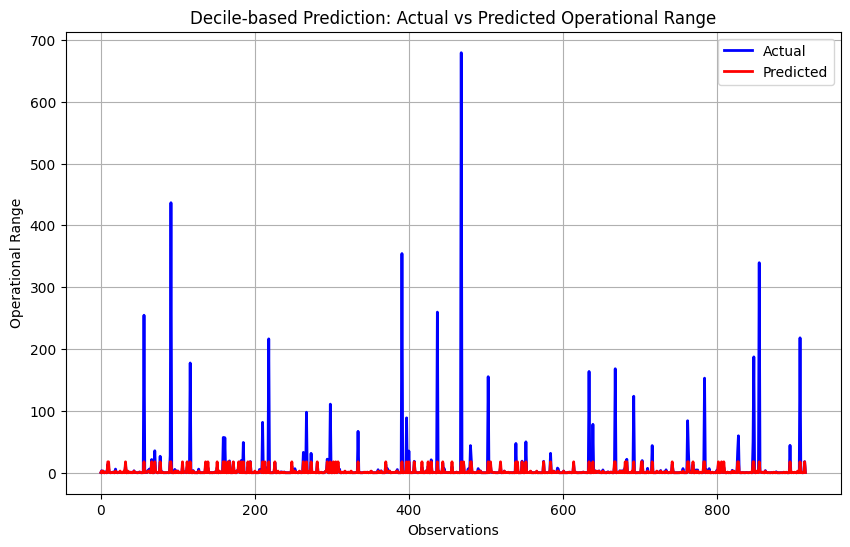

In [ ]:
# Decile-based Prediction
y_train_deciles = pd.qcut(y_train, q=10, labels=False)
y_val_deciles = pd.qcut(y_val, q=10, labels=False)
y_pred_deciles = pd.Series(np.median(y_train[y_train_deciles == d]) for d in y_val_deciles)

# Metrics
mae_decile = mean_absolute_error(y_val, y_pred_deciles)
mse_decile = mean_squared_error(y_val, y_pred_deciles)
rmse_decile = np.sqrt(mse_decile)
r2_decile = r2_score(y_val, y_pred_deciles)

# Print metrics
print("Decile-based Prediction Results:")
print(f"MAE: {mae_decile}, MSE: {mse_decile}, RMSE: {rmse_decile}, R²: {r2_decile}")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label='Actual', color='b', linewidth=2)
plt.plot(y_pred_deciles, label='Predicted', color='r', linewidth=2)
plt.title("Decile-based Prediction: Actual vs Predicted Operational Range")
plt.xlabel("Observations")
plt.ylabel("Operational Range")
plt.legend()
plt.grid(0.3)
plt.show()

Full Custom Bayesian Linear Regression Implementation

Bayesian Linear Regression Prediction Results:
MAE: 2.580456238424698, MSE: 64.77430482169824, RMSE: 8.048248556157931, R²: 0.9563654491710977


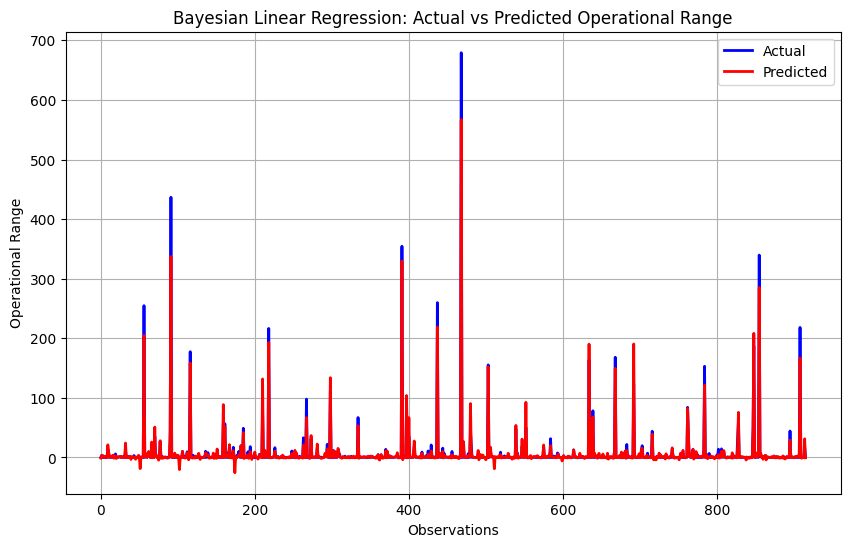

In [ ]:
# Bayesian Linear Regression
class BayesianLinearRegression:
    def __init__(self, alpha=1.0, beta=1.0):
        self.alpha = alpha
        self.beta = beta
        self.weights_mean = None
        self.weights_cov = None

    def fit(self, X, y):
        N, d = X.shape
        X_b = np.c_[np.ones((N, 1)), X]
        S_0_inv = self.alpha * np.eye(d + 1)
        S_N_inv = S_0_inv + self.beta * X_b.T @ X_b
        self.weights_cov = np.linalg.inv(S_N_inv)
        self.weights_mean = self.beta * self.weights_cov @ X_b.T @ y

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b @ self.weights_mean

# Initialize and fit the model
model = BayesianLinearRegression(alpha=1.0, beta=1.0)
model.fit(X_train, y_train)

# Make predictions
y_pred_blr = model.predict(X_val)

# Metrics
mae_blr = mean_absolute_error(y_val, y_pred_blr)
mse_blr = mean_squared_error(y_val, y_pred_blr)
rmse_blr = np.sqrt(mse_blr)
r2_blr = r2_score(y_val, y_pred_blr)

# Print metrics
print("Bayesian Linear Regression Prediction Results:")
print(f"MAE: {mae_blr}, MSE: {mse_blr}, RMSE: {rmse_blr}, R²: {r2_blr}")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label='Actual', color='b', linewidth=2)
plt.plot(y_pred_blr, label='Predicted', color='r', linewidth=2)
plt.title("Bayesian Linear Regression: Actual vs Predicted Operational Range")
plt.xlabel("Observations")
plt.ylabel("Operational Range")
plt.legend()
plt.grid(0.3)
plt.show()